<a href="https://colab.research.google.com/github/Sherin5/PyTorch_Youtube/blob/main/Into_To_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import torch

In [11]:
import numpy as np

In [12]:
import torch.nn as nn
import torch.nn.functional as F


In [13]:
class Model(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=9, out=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x


In [14]:
torch.manual_seed(41)
model = Model()

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [16]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)

In [18]:
df['species'] = df['species'].replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])

In [19]:
X =df.drop('species', axis=1).values
y = df['species'].values

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [22]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [23]:
## Measure error
criterion = nn.CrossEntropyLoss()
#Choose optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [24]:
## TRain our model
## Epochs: one run thorugh all our training data

epochs=100
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i%10 == 0:
    print("epoch:", i, "loss:", loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: tensor(1.1252, grad_fn=<NllLossBackward0>)
epoch: 10 loss: tensor(1.0096, grad_fn=<NllLossBackward0>)
epoch: 20 loss: tensor(0.8157, grad_fn=<NllLossBackward0>)
epoch: 30 loss: tensor(0.5857, grad_fn=<NllLossBackward0>)
epoch: 40 loss: tensor(0.4000, grad_fn=<NllLossBackward0>)
epoch: 50 loss: tensor(0.2677, grad_fn=<NllLossBackward0>)
epoch: 60 loss: tensor(0.1794, grad_fn=<NllLossBackward0>)
epoch: 70 loss: tensor(0.1215, grad_fn=<NllLossBackward0>)
epoch: 80 loss: tensor(0.0860, grad_fn=<NllLossBackward0>)
epoch: 90 loss: tensor(0.0652, grad_fn=<NllLossBackward0>)


Text(0.5, 0, 'Epoch')

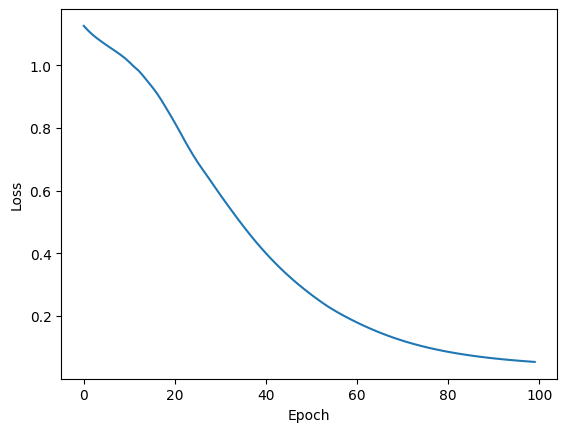

In [25]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [26]:
## Test our model on our test data
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)
print("Loss:", loss)

Loss: tensor(0.1315)


In [27]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    print(f'{i+1}.) {str(y_val)}')

1.) tensor([-5.8760,  4.4628,  6.5124])
2.) tensor([-7.5436,  4.1670,  9.7255])
3.) tensor([-8.4504,  5.1271, 10.1987])
4.) tensor([-4.3398,  5.6267,  2.5608])
5.) tensor([-7.1825,  4.8754,  8.2992])
6.) tensor([-3.3974,  5.3463,  1.2803])
7.) tensor([-5.9231,  4.9822,  5.9997])
8.) tensor([-4.2881,  5.7003,  2.3889])
9.) tensor([-6.5356,  4.9257,  7.1260])
10.) tensor([-8.0509,  4.4129, 10.3286])
11.) tensor([-5.6762,  4.9500,  5.6215])
12.) tensor([ 4.5662, -2.2476, -2.8911])
13.) tensor([ 4.2571, -1.9967, -2.7330])
14.) tensor([-2.1108,  4.0515,  0.5799])
15.) tensor([ 3.4575, -1.2098, -2.3514])
16.) tensor([-5.4724,  5.1165,  5.0934])
17.) tensor([ 4.0557, -1.7949, -2.6492])
18.) tensor([-5.8075,  4.6053,  6.2458])
19.) tensor([ 4.4343, -2.1392, -2.8242])
20.) tensor([ 3.4527, -1.2514, -2.3660])
21.) tensor([-2.6189,  4.5619,  0.8574])
22.) tensor([-7.7412,  4.7377,  9.4199])
23.) tensor([ 3.5743, -1.3221, -2.4135])
24.) tensor([ 4.5365, -2.2383, -2.8684])
25.) tensor([-2.6579,  4.